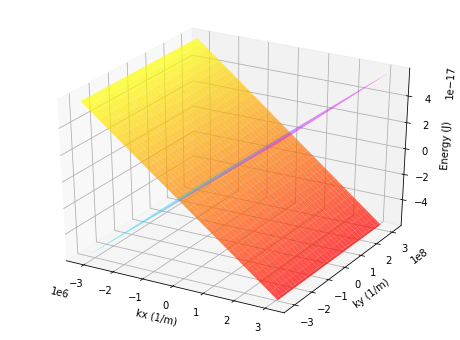

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import physical_constants

mu_B = physical_constants['Bohr magneton'][0]
# Define the parameters
m_star = 0.05 # effective mass in units of m0
g = 2 # g-factor
B = 1 # magnetic field in Tesla
eta = 10e-11 - m_star # momentum scattering rate in eV-m
nu = 2*eta # spin-flip scattering rate in eV-m
hbar = 1.054e-34
Lx = 1e-6
Ly = 1e-8
Lz = 1e-7

# Define the range of wavevectors
kx = np.linspace(-np.pi/Lx, np.pi/Lx, 101) # 101 points from -pi/Lx to pi/Lx
ky = np.linspace(-np.pi/Ly, np.pi/Ly, 101) # 101 points from -pi/Ly to pi/Ly
kx, ky = np.meshgrid(kx, ky)

# Calculate the energy levels for spin-up and spin-down states
k2 = kx**2 + ky**2
E_up = hbar**2 * k2 / (2 * m_star) + g * mu_B * B * kx + hbar**2 * k2**2 / (8 * m_star**2) - hbar**2 * k2 * np.sqrt(k2) * nu / (2 * m_star**2) + hbar**2 * ky**2 / (2 * m_star) + hbar**2 * np.pi**2 / (2 * m_star * Lz**2)
E_down = hbar**2 * k2 / (2 * m_star) - g * mu_B * B * kx + hbar**2 * k2**2 / (8 * m_star**2) - hbar**2 * k2 * np.sqrt(k2) * nu / (2 * m_star**2) + hbar**2 * ky**2 / (2 * m_star) + hbar**2 * np.pi**2 / (2 * m_star * Lz**2)

# Plot the energy dispersion relation
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx, ky, E_up, cmap='cool', alpha=0.7)
ax.plot_surface(kx, ky, E_down, cmap='autumn', alpha=0.7)
ax.set_xlabel('kx (1/m)')
ax.set_ylabel('ky (1/m)')
ax.set_zlabel('Energy (J)')
plt.show()


## Problem 1

Problem 1
(i) B = 1 T 
(1) η = 10−11eV − m, ν = 2η

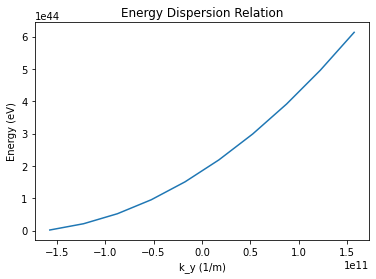

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 512
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 10 # number of eigenvalues to compute
vals, vecs = eigsh(H, k=n_eig, which='SM')

# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()


Problem 1
(i) B = 0 T 
(1) η = 10−11eV − m, ν = 2η

[1.94451089e+42 2.13903148e+43 5.22928499e+43 9.54446037e+43
 1.50899423e+44 2.18668081e+44 2.98754037e+44 3.91158690e+44
 4.95882695e+44 6.12926394e+44 7.42289980e+44 8.83973568e+44
 1.03797723e+45 1.20430101e+45 1.38294495e+45 1.57390906e+45
 1.77719337e+45 1.99279787e+45 2.22072259e+45 2.46096753e+45
 2.71353269e+45 2.97841808e+45 3.25562370e+45 3.54514955e+45
 3.84699564e+45 4.16116196e+45 4.48764852e+45 4.82645532e+45
 5.17758236e+45 5.54102963e+45 5.91679715e+45 6.30488491e+45
 6.70529292e+45 7.11802116e+45 7.54306965e+45 7.98043838e+45
 8.43012735e+45 8.89213657e+45 9.36646603e+45 9.85311573e+45
 1.03520857e+46 1.08633759e+46 1.13869863e+46 1.19229170e+46
 1.24711679e+46 1.30317391e+46 1.36046305e+46 1.41898422e+46
 1.47873741e+46 1.53972262e+46 1.60193986e+46 1.66538912e+46
 1.73007041e+46 1.79598372e+46 1.86312906e+46 1.93150642e+46
 2.00111581e+46 2.07195722e+46 2.14403065e+46 2.21733611e+46
 2.29187360e+46 2.36764311e+46 2.44464464e+46 2.52287820e+46
 2.60234378e+46 2.683041

c:\Users\DRA\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


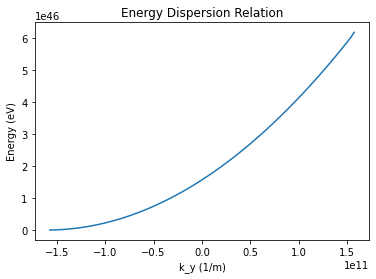

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 512
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 0 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 100 # number of eigenvalues to compute
vals, vecs = eigsh(H.toarray(), k=n_eig, which='SM')


# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
print(E)
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

(2) η = 10−11eV − m, ν = η

[1.94451089e+42 2.13903148e+43 5.22928499e+43 9.54446037e+43
 1.50899423e+44 2.18668081e+44 2.98754037e+44 3.91158690e+44
 4.95882695e+44 6.12926394e+44 7.42289980e+44 8.83973568e+44
 1.03797723e+45 1.20430101e+45 1.38294495e+45 1.57390906e+45
 1.77719337e+45 1.99279787e+45 2.22072259e+45 2.46096753e+45
 2.71353269e+45 2.97841808e+45 3.25562370e+45 3.54514955e+45
 3.84699564e+45 4.16116196e+45 4.48764852e+45 4.82645532e+45
 5.17758236e+45 5.54102963e+45 5.91679715e+45 6.30488491e+45
 6.70529292e+45 7.11802116e+45 7.54306965e+45 7.98043838e+45
 8.43012735e+45 8.89213657e+45 9.36646603e+45 9.85311573e+45
 1.03520857e+46 1.08633759e+46 1.13869863e+46 1.19229170e+46
 1.24711679e+46 1.30317391e+46 1.36046305e+46 1.41898422e+46
 1.47873741e+46 1.53972262e+46 1.60193986e+46 1.66538912e+46
 1.73007041e+46 1.79598372e+46 1.86312906e+46 1.93150642e+46
 2.00111581e+46 2.07195722e+46 2.14403065e+46 2.21733611e+46
 2.29187360e+46 2.36764311e+46 2.44464464e+46 2.52287820e+46
 2.60234378e+46 2.683041

c:\Users\DRA\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


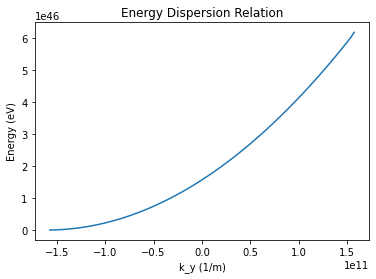

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 911
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = eta # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) +  g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 100 # number of eigenvalues to compute
vals, vecs = eigsh(H.toarray(), k=n_eig, which='SM')


# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
print(E)
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

[1.94451089e+42 2.13903148e+43 5.22928499e+43 9.54446037e+43
 1.50899423e+44 2.18668081e+44 2.98754037e+44 3.91158690e+44
 4.95882695e+44 6.12926394e+44 7.42289980e+44 8.83973568e+44
 1.03797723e+45 1.20430101e+45 1.38294495e+45 1.57390906e+45
 1.77719337e+45 1.99279787e+45 2.22072259e+45 2.46096753e+45
 2.71353269e+45 2.97841808e+45 3.25562370e+45 3.54514955e+45
 3.84699564e+45 4.16116196e+45 4.48764852e+45 4.82645532e+45
 5.17758236e+45 5.54102963e+45 5.91679715e+45 6.30488491e+45
 6.70529292e+45 7.11802116e+45 7.54306965e+45 7.98043838e+45
 8.43012735e+45 8.89213657e+45 9.36646603e+45 9.85311573e+45
 1.03520857e+46 1.08633759e+46 1.13869863e+46 1.19229170e+46
 1.24711679e+46 1.30317391e+46 1.36046305e+46 1.41898422e+46
 1.47873741e+46 1.53972262e+46 1.60193986e+46 1.66538912e+46
 1.73007041e+46 1.79598372e+46 1.86312906e+46 1.93150642e+46
 2.00111581e+46 2.07195722e+46 2.14403065e+46 2.21733611e+46
 2.29187360e+46 2.36764311e+46 2.44464464e+46 2.52287820e+46
 2.60234378e+46 2.683041

c:\Users\DRA\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


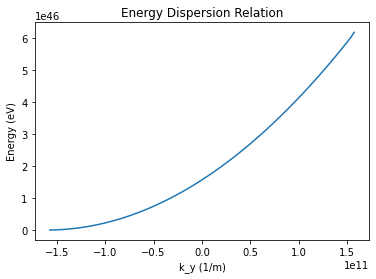

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 911
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 0 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = eta # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 100 # number of eigenvalues to compute
vals, vecs = eigsh(H.toarray(), k=n_eig, which='SM')


# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
print(E)
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

(3) η = 10−11eV − m, ν = 0

[1.94451089e+42 2.13903148e+43 5.22928499e+43 9.54446037e+43
 1.50899423e+44 2.18668081e+44 2.98754037e+44 3.91158690e+44
 4.95882695e+44 6.12926394e+44 7.42289980e+44 8.83973568e+44
 1.03797723e+45 1.20430101e+45 1.38294495e+45 1.57390906e+45
 1.77719337e+45 1.99279787e+45 2.22072259e+45 2.46096753e+45
 2.71353269e+45 2.97841808e+45 3.25562370e+45 3.54514955e+45
 3.84699564e+45 4.16116196e+45 4.48764852e+45 4.82645532e+45
 5.17758236e+45 5.54102963e+45 5.91679715e+45 6.30488491e+45
 6.70529292e+45 7.11802116e+45 7.54306965e+45 7.98043838e+45
 8.43012735e+45 8.89213657e+45 9.36646603e+45 9.85311573e+45
 1.03520857e+46 1.08633759e+46 1.13869863e+46 1.19229170e+46
 1.24711679e+46 1.30317391e+46 1.36046305e+46 1.41898422e+46
 1.47873741e+46 1.53972262e+46 1.60193986e+46 1.66538912e+46
 1.73007041e+46 1.79598372e+46 1.86312906e+46 1.93150642e+46
 2.00111581e+46 2.07195722e+46 2.14403065e+46 2.21733611e+46
 2.29187360e+46 2.36764311e+46 2.44464464e+46 2.52287820e+46
 2.60234378e+46 2.683041

c:\Users\DRA\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


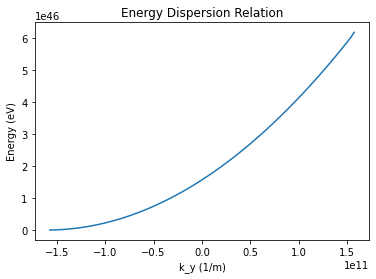

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 911
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = 0 # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 100 # number of eigenvalues to compute
vals, vecs = eigsh(H.toarray(), k=n_eig, which='SM')


# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
print(E)
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

[1.94451089e+42 2.13903148e+43 5.22928499e+43 9.54446037e+43
 1.50899423e+44 2.18668081e+44 2.98754037e+44 3.91158690e+44
 4.95882695e+44 6.12926394e+44 7.42289980e+44 8.83973568e+44
 1.03797723e+45 1.20430101e+45 1.38294495e+45 1.57390906e+45
 1.77719337e+45 1.99279787e+45 2.22072259e+45 2.46096753e+45
 2.71353269e+45 2.97841808e+45 3.25562370e+45 3.54514955e+45
 3.84699564e+45 4.16116196e+45 4.48764852e+45 4.82645532e+45
 5.17758236e+45 5.54102963e+45 5.91679715e+45 6.30488491e+45
 6.70529292e+45 7.11802116e+45 7.54306965e+45 7.98043838e+45
 8.43012735e+45 8.89213657e+45 9.36646603e+45 9.85311573e+45
 1.03520857e+46 1.08633759e+46 1.13869863e+46 1.19229170e+46
 1.24711679e+46 1.30317391e+46 1.36046305e+46 1.41898422e+46
 1.47873741e+46 1.53972262e+46 1.60193986e+46 1.66538912e+46
 1.73007041e+46 1.79598372e+46 1.86312906e+46 1.93150642e+46
 2.00111581e+46 2.07195722e+46 2.14403065e+46 2.21733611e+46
 2.29187360e+46 2.36764311e+46 2.44464464e+46 2.52287820e+46
 2.60234378e+46 2.683041

c:\Users\DRA\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


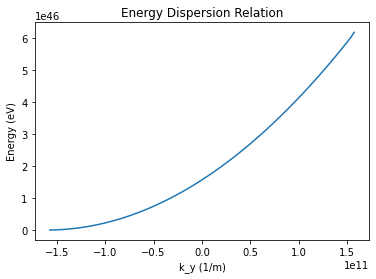

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m = 911
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 0 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11-m # parameter eta in eV-m
nu = 0 # parameter nu in eV-m^2

# Construct the Hamiltonian
H = scipy.sparse.lil_matrix((N_y, N_y), dtype=complex)

for i in range(N_y):
    # Diagonal element
    H[i, i] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
        + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    # Off-diagonal elements along y-axis
    if i < N_y-1:
        H[i, i+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
        H[i+1, i] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)

# Solve the eigenvalue problem
n_eig = 100 # number of eigenvalues to compute
vals, vecs = eigsh(H.toarray(), k=n_eig, which='SM')


# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
print(E)
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), n_eig)
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

## Problem 2

(1) η = 10−11eV − m, ν = 2η

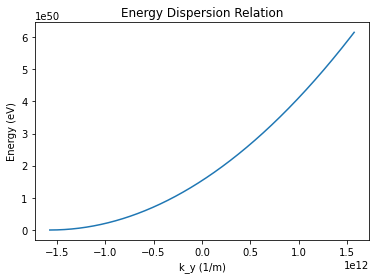

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 911 
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 1000 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 - m # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the energy dispersion relation
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), N_y)
E = []
for i in range(N_y):
    E_k = (np.pi**2 * i**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    E.append(E_k)

# Plot the energy dispersion relation
E = np.array(E)/(1.60217662e-19) # convert energy from J to eV
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()



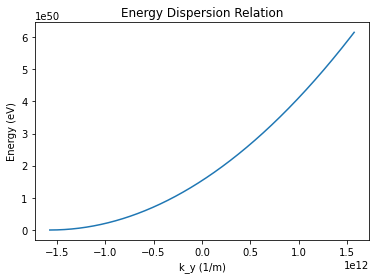

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 911 
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 0 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 1000 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 - m # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the energy dispersion relation
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), N_y)
E = []
for i in range(N_y):
    E_k = (np.pi**2 * i**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    E.append(E_k)

# Plot the energy dispersion relation
E = np.array(E)/(1.60217662e-19) # convert energy from J to eV
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

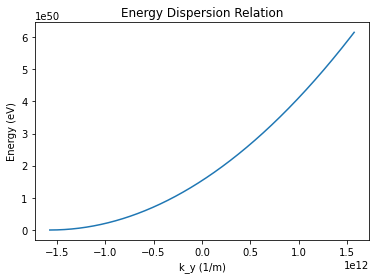

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 911 
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 1000 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 - m # parameter eta in eV-m
nu = 0 # parameter nu in eV-m^2

# Construct the energy dispersion relation
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), N_y)
E = []
for i in range(N_y):
    E_k = (np.pi**2 * i**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
    E.append(E_k)

# Plot the energy dispersion relation
E = np.array(E)/(1.60217662e-19) # convert energy from J to eV
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()

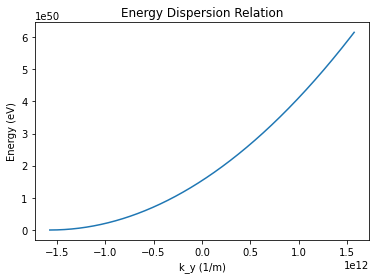

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 1000 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the energy dispersion relation
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), N_y)
E = []
for i in range(N_y):
    E_k = (np.pi**2 * i**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 + nu * ((i+0.5)*delta_y)**2
    E.append(E_k)

# Add Rashba spin-orbit coupling
E += alpha * np.abs(k_y)

# Plot the energy dispersion relation
E = np.array(E)/(1.60217662e-19) # convert energy from J to eV
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()


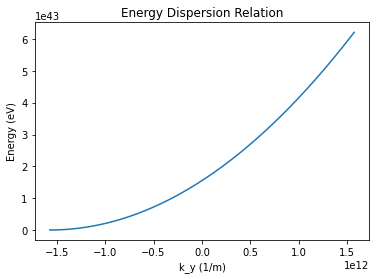

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 1000 # number of points along y-axis
delta_y = L_y/N_y # grid spacing along y-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the energy dispersion relation using variable separation approximation
k_y = np.linspace(-np.pi/(2*delta_y), np.pi/(2*delta_y), N_y)
E = []
for i in range(N_y):
    k_zn = np.pi * i / L_z
    E_k = np.sqrt((g * mu_B * B)**2 + (np.pi**2 * i**2 * (1/L_z**2 + 1/L_y**2) + alpha**2 * k_y[i]**2 + nu * k_zn**2)**2 - 4 * alpha**2 * k_y[i]**2 * (g * mu_B * B + np.pi**2 * i**2 / (L_y * L_z)))
    E.append(E_k)

# Plot the energy dispersion relation
E = np.array(E)/(1.60217662e-19) # convert energy from J to eV
plt.plot(k_y, E)
plt.xlabel('k_y (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()


In [31]:
pip install scipy

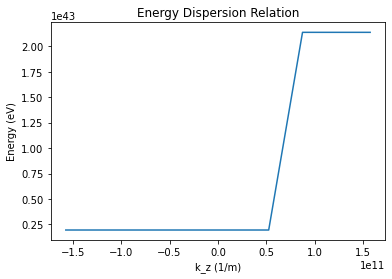

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.sparse import lil_matrix, kron, eye
from scipy.sparse.linalg import eigsh
import scipy.sparse as sp


# Constants
m_star = 0.05 # effective mass of the electron in units of m0
g = 2 # Landé g-factor
mu_B = 9.2740099e-24 # Bohr magneton in J/T
B = 1 # magnetic field in T
alpha = 1e-10 # Rashba spin-orbit coupling constant in eV m
L_y = 1e-9 # length along y-axis in meters
L_z = 10e-9 # length along z-axis in meters
L_x = 100e-9 # length along x-axis in meters
N_y = 100 # number of points along y-axis
N_z = 1000 # number of points along z-axis
delta_y = L_y/N_y # grid spacing along y-axis
delta_z = L_z/N_z # grid spacing along z-axis
V_y = np.zeros(N_y) # potential energy along y-axis
eta = 1e-11 # parameter eta in eV-m
nu = 2*eta # parameter nu in eV-m^2

# Construct the Hamiltonian
#H = lil_matrix((N_y*N_z, N_y*N_z), dtype=np.float64)
H = scipy.sparse.lil_matrix((N_y*N_z, N_y*N_z), dtype=complex)


for j in range(N_z):
    for i in range(N_y):
        idx = j*N_y + i # index of the current grid point
        # Diagonal element
        H[idx, idx] = (np.pi**2 * (i+1)**2)/(2 * m_star * delta_y**2) + g * mu_B * B/2 \
            + alpha * (i+0.5) * delta_y + nu * ((i+0.5)*delta_y)**2
        # Off-diagonal elements along y-axis
        if i < N_y-1:
            H[idx, idx+1] = -np.pi**2 * (i+1)/(2 * m_star * delta_y**2)
            H[idx+1, idx] = -np.pi**2 * (i+2)/(2 * m_star * delta_y**2)
        # Off-diagonal elements along z-axis
        if j < N_z-1:
            H[idx, idx+N_y] = -1j*eta/delta_z
            H[idx+N_y, idx] = 1j*eta/delta_z

# Solve the eigenvalue problem
n_eig = 10 # number of eigenvalues to compute
vals, vecs = eigsh(H, k=n_eig, which='SM')

# Sort the eigenvalues and eigenvectors
idx_sort = np.argsort(vals)
vals_sorted = vals[idx_sort]
vecs_sorted = vecs[:, idx_sort]

# Plot the energy dispersion relation
E = vals_sorted/(1.60217662e-19) # convert energy from J to eV
k_z = np.linspace(-np.pi/(2*delta_z), np.pi/(2*delta_z), n_eig)
plt.plot(k_z, E)
plt.xlabel('k_z (1/m)')
plt.ylabel('Energy (eV)')
plt.title('Energy Dispersion Relation')
plt.show()
